In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools
import numpy as np


# Comparison ELM vs NN vs oDA-ELM vs oFW-ELM

In [2]:
cases = ['elm', 'sgd','oDA_elm', "oFW_elm", "dummy"]

FileNotFoundError: [Errno 2] No such file or directory: '../data/exp/elm_square.csv'

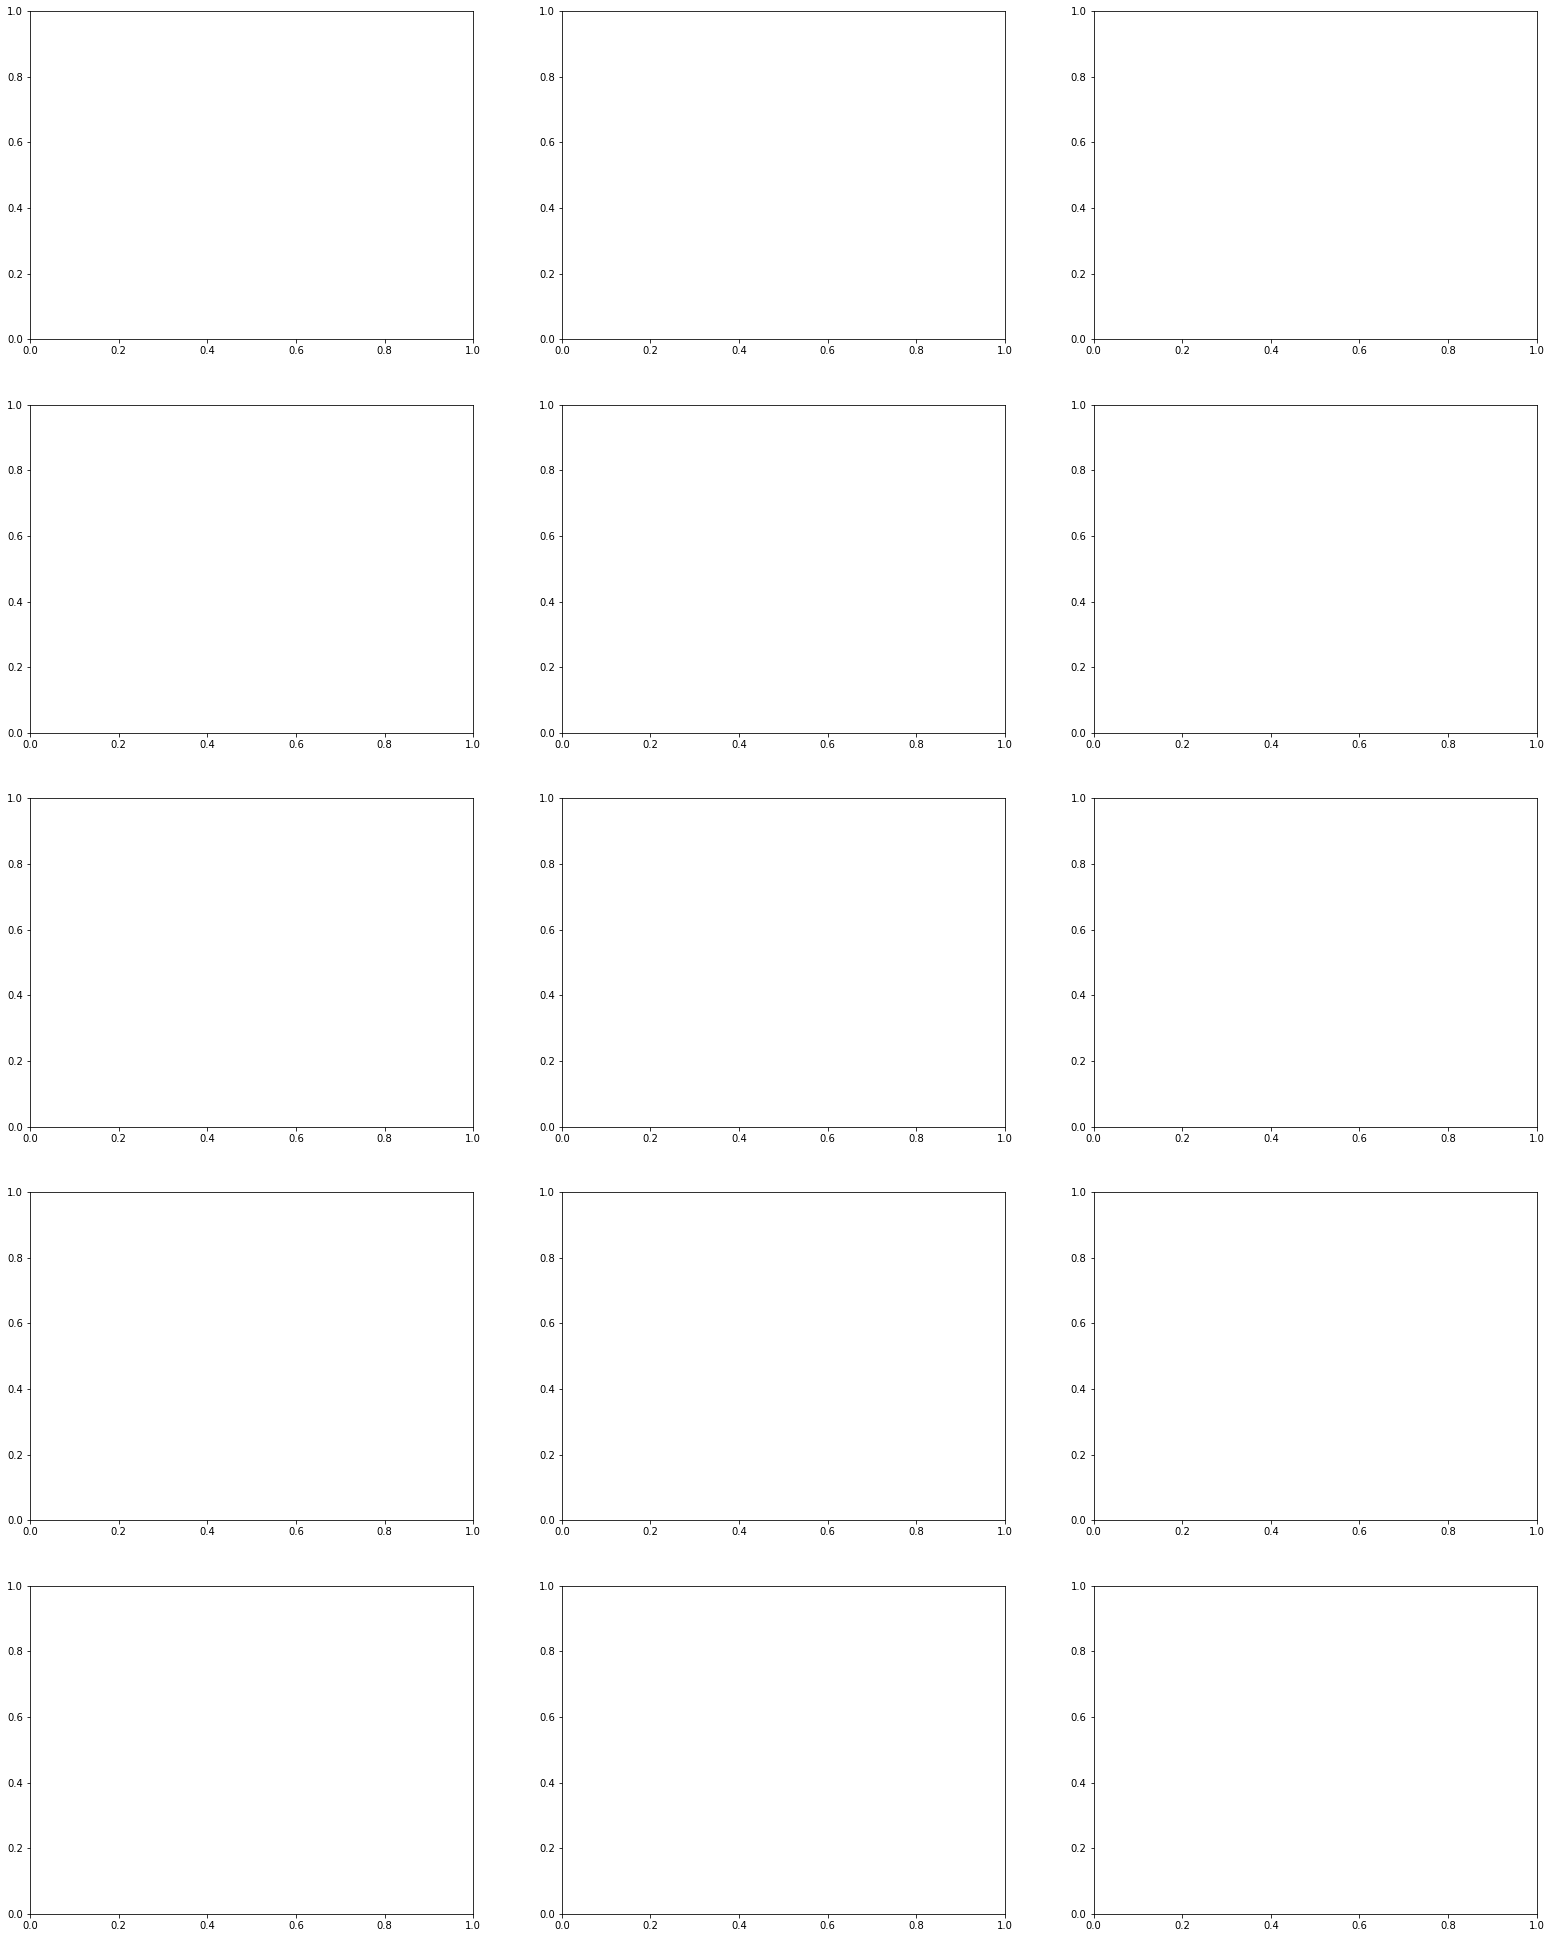

In [3]:
func_name = "square"
f, ax = plt.subplots(5,3,figsize = (27,35))

dir_name = "../data/exp"

t_min = 3
t_max = -1

for i, case in enumerate(cases):
    df = pd.read_csv("{}/{}_{}.csv".format(dir_name, case, func_name))

    ax[i,0].set_title('$\widetilde{\dot{h}}$', fontsize = 18)

    # First plot 
    ax[i,0].plot(df['dhe_real'][t_min:t_max] - df['dhe'][t_min:t_max], 'r')
    #ax[i,0].plot(, 'k')
    ax[i,0].legend(['$\widetilde{\dot{h}}_{est}$','$\widehat{\dot{h}}_{real}$'], fontsize = 18)

    # Second plot
    ax[i,1].set_title('CBF', fontsize = 18)
    ax[i,1].plot(df['h'][t_min:t_max], 'b')

    # Third plot
    ax[i,2].set_title('Distance', fontsize = 18)

    ax[i,2].plot(df['z'][t_min:t_max], 'b')
    v = df['v'][t_min:t_max]
    ax[i,2].plot(1.8*v, linewidth=3, color = 'k')
    ax[i,2].legend(['$z$', 'safe $z$'], fontsize = 18)


pad = 5
for axy, row in zip(ax[:,0], cases):
    axy.annotate(row,xy=(0, 0.5), xytext=(-axy.yaxis.labelpad-pad,0),                    
                xycoords=axy.yaxis.label, textcoords='offset points',
                size=20, ha='right', va='center')


In [9]:
ls ../data/exp

dummy_sin.csv     elm_square.csv      oDA_elm_step.csv    sgd.csv
dummy_square.csv  elm_step.csv        oFW_elm_sin.csv     sgd_sin.csv
dummy_step.csv    oDA_elm_sin.csv     oFW_elm_square.csv  sgd_square.csv
elm_sin.csv       oDA_elm_square.csv  oFW_elm_step.csv    sgd_step.csv


## First case - step

In [ ]:
#fn_elm = "../data/elm/lr_pre_0.0001_lr_post_0.001_z0_33_v0_23_func_sin.csv"
fn_elm = "../data/sgd/lr_0.01_z0_34_v0_22_func_sin.csv"
df_elm = pd.read_csv(fn_elm)


In [ ]:
f,ax = plt.subplots(7,1,figsize = (13,26))

ax[0].plot(df_elm['v'])
ax[0].grid(True)
ax[0].set_title('State - velocity')

ax[1].plot(df_elm['z'])
ax[1].grid(True)
ax[1].set_title('State - distance')

ax[1].plot(1.8*df_elm['v'])#  + 0.5*(np.array(x_lst)[exp,:,1] - v_ego)/c_d/g)

ax[2].plot(df_elm['u'])
ax[2].plot(df_elm['u_ref'])
ax[2].grid(True)
ax[2].set_title('Control input')


ax[3].plot(df_elm['slack'])
ax[3].grid(True)
ax[3].set_title('Slack variable')


ax[4].plot(df_elm['h'])
ax[4].grid(True)
ax[4].set_title('CBF')

ax[5].plot(df_elm['V'])
ax[5].grid(True)
ax[5].set_title('CLF')

#ax[6].plot(t_lns[1:], np.array(dhes_lst)[i, 1:])
ax[6].plot(df_elm['dhe'][3:])
ax[6].plot(df_elm['dhe_real'][3:])

ax[6].grid(True)
ax[6].set_title('$dh_{error}$')


#ax[6].set_ylim([-10,10])
ax[6].legend(['$dhe_{est}$','$dhe_{real}$'])


In [ ]:
fn_elm = "../data/elm/lr_pre_0.001_lr_post_0.001_z0_34_v0_22_func_step.csv"
fn_sgd = "../data/sgd/lr_0.v0_20_func_step.csv"
fn_dummy = "../data/dummy/lr_0.01_z0_36_v0_20_func_step.csv"

In [ ]:
fn_elm = "../data/elm/lr_pre_0.001_lr_post_0.001_z0_34_v0_22_func_step.csv"
fn_sgd = "../data/sgd/lr_0.01_z0_34_v0_22_func_step.csv"
#fn_dummy = "../data/dummy/lr_0.01_z0_36_v0_20_func_step.csv"

In [ ]:
df_elm = pd.read_csv(fn_elm)
#df_sgd = pd.read_csv(fn_sgd)
#df_dummy = pd.read_csv(fn_dummy)


In [ ]:
# ELM vs SGD

In [ ]:
f, ax = plt.subplots(figsize = (15,6))

ax.plot(df_elm['dhe'][3:1000] - df_elm['dhe_real'][3:1000], linewidth=3, color = 'blue')
ax.plot(df_sgd['dhe'][3:1000] - df_sgd['dhe_real'][3:1000], linewidth=3, color = 'green')
ax.legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
#ax.set_ylim([-2,2])

In [ ]:
f, ax = plt.subplots(figsize = (15,6))


ax.plot(df_elm['h'][3:], linewidth=3, color = 'blue')
#ax.plot(df_elm['dhe_real'][3:], linewidth=3, color = 'green')

ax.legend(['$\widetilde{\dot{h}}_{est}$','$\widetilde{\dot{h}}_{real}$'], fontsize = 14)
#ax.set_ylim(-10,10)


In [ ]:
f, ax = plt.subplots(figsize = (15,6))


ax.plot(df_elm['dhe_real'][3:], linewidth=3, color = 'green')
ax.plot(df_elm['dhe'][3:], linewidth=3, color = 'blue')
ax.legend(['$\widetilde{\dot{h}}_{est}$','$\widetilde{\dot{h}}_{real}$'], fontsize = 14)
ax.set_ylim([-10,10])

In [ ]:
f, ax = plt.subplots(figsize = (15,6))

ax.plot(df_sgd['dhe'][3:], linewidth=3, color = 'blue')
ax.plot(df_sgd['dhe_real'][3:], linewidth=3, color = 'green')
ax.legend(['$\widetilde{\dot{h}}_{est}$','$\widetilde{\dot{h}}_{real}$'], fontsize = 14)
    

In [ ]:
plt.plot(df_dummy['h'][3:], linewidth=3, color = 'blue')


In [ ]:
f,ax = plt.subplots(1,1,figsize = (8,6))

ax.plot(df['v'][3:], df['z'][3:], linewidth=3, color = 'blue')
ax.legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
v_space = np.linspace(17, 28, 100)
ax.plot(v_space, 1.8*v_space, linewidth=3, color = 'black')

In [ ]:
lr_pres =  [1e-3]   #[1e-2, 1e-3]
lr_posts =  [1e-3]  #[1e-2]
lrs = [1e-2]

z0s = [28,30,32,34,38] #[36]#[30,32,34,38]  #[30, 34, 38]
v0s = [20,22,24,26] # [20]#[20,22,24,26]
funcs = ["step", "sin", "square"] # Square or sin

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s, funcs)))
f, ax = plt.subplots(cases, 2, figsize = (15,cases*6))

i = 0
data_dir = '../data/elm'
for lr_pre, lr_post, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i,0].plot(df['dhe'][3:1000], linewidth=3, color = 'blue')
    ax[i,0].plot(df['dhe_real'][3:1000], linewidth=3, color = 'green')
    ax[i,0].legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
    ax[i,0].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
    i+=1
    
    
i = 0
data_dir = '../data/sgd'
for lr, z0, v0, func in itertools.product(lrs, z0s, v0s, funcs):
    fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i,1].plot(df['dhe'][3:1000], linewidth=3, color = 'blue')
    ax[i,1].plot(df['dhe_real'][3:1000], linewidth=3, color = 'green')
    ax[i,1].legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
    
    ax[i,1].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
    
    i=i+1

In [ ]:
input_size = 3 
n_hidden = 100
output_size = 1

learned_ratio = 1.5
time_th = learned_ratio* hidden_size


lr_pre = 1e-3
lr_post = 1e-3
lr = 1e-2

z0 = 30 # 38 #30
v0 = 26 #24 #26
func = 'square'#'sin'#'square'


f, ax = plt.subplots(1, 2, figsize = (15,6))


data_dir = '../data/elm'

fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
path = os.path.join(data_dir, fn)
df = pd.read_csv(path)

ax[1].plot(df['dhe'][3:800], linewidth=3, color = 'blue')
ax[1].plot(df['dhe_real'][3:800], linewidth=3, color = 'green')
ax[1].legend(['$\widetilde{\dot{h}}_{est}$','$\widetilde{\dot{h}}_{real}$'], fontsize = 14)
#ax[0].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
ax[1].set_title("Extreme Learning Machine", fontsize = 16)
ax[1].axvline(x = n_hidden*learned_ratio, color = 'red')


data_dir = '../data/sgd'

fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
path = os.path.join(data_dir, fn)
df = pd.read_csv(path)

ax[0].plot(df['dhe'][3:800], linewidth=3, color = 'blue')
ax[0].plot(df['dhe_real'][3:800], linewidth=3, color = 'green')
ax[0].legend(['$\widetilde{\dot{h}}_{est}$','$\widetilde{\dot{h}}_{real}$'], fontsize = 14)

#ax[1].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
ax[0].set_title("Feedforward Neural Network", fontsize = 16)

ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylim([-15,15])
ax[1].set_ylim([-15,15])
ax[0].set_xlabel("Time step")
ax[1].set_xlabel("Time step")

f.suptitle("Tracking error of control barrier function derivative for a {} function uncertainty.".format(func), fontsize = 18)


In [ ]:

lr_pre = 1e-3
lr_post = 1e-3
lr = 1e-2

z0 = 30
v0 = 26
func = 'square'


f, ax = plt.subplots(1, 2, figsize = (15,6))


data_dir = '../data/elm'

fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
path = os.path.join(data_dir, fn)
df = pd.read_csv(path)

ax[0].plot(df['h'][3:500], linewidth=3, color = 'brown')
ax[0].plot(np.zeros(500), linewidth=3, color = 'blue')

ax[0].legend(['$h(x)$'], fontsize = 14)
ax[0].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)

data_dir = '../data/sgd'

fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
path = os.path.join(data_dir, fn)
df = pd.read_csv(path)

ax[1].plot(df['h'][3:500], linewidth=3, color = 'brown')
ax[1].plot(np.zeros(500), linewidth=3, color = 'blue')
ax[1].legend(['$h(x)$'], fontsize = 14)

ax[1].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)


In [ ]:

start = 0
exp = 9

#h_perf = np.array(B_perf_lst)[exp,start:]

for exp in range(10):
    if exp % 2 == 0:
        z = np.array(x_lst)[exp,start:,2]# np.array(B_lst)[exp,start:]
        v = np.array(x_lst)[exp,start:,1]
        ax.plot(v, z, 'black', alpha = 0.1 * (exp + 1), linewidth = 3)
        

        
        
ax.grid(True)
#ax.set_title('Safe distance performance vs velocity. $z \geq T_h v$', fontsize= 18)
#ax.legend(['estimated','real'],fontsize= 16) 
ax.set_ylabel('$z$ (m)', fontsize= 18)
ax.set_xlabel('$v$ (m/s)', fontsize= 18)

v_min = 20
v_max = 24.5
z_min = 35.5
z_max = 43.5

v_span = np.linspace(v_min, v_max, 50)
ax.plot(v_span, v_span*Th, 'blue',linewidth = 4 )


ax.legend(['$exp=1$','$exp=3$','$exp=5$','$exp=7$','$exp=9$','$h(x)$'],fontsize= 16) 
plt.gca().fill_between(v_span, v_span*Th, z_max, v_span > 0, color = (0.552, 0.788, 0.949))
ax.set_ylim(z_min, z_max)
ax.set_xlim(v_min, v_max)

ax.text(21,40,'$\mathcal{C}$', fontsize=54)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
# Best: df = pd.read_csv('data/oselm/0.001_0.0001_34_20_square.csv')
# Compare square and sin.

# High peak: df = pd.read_csv('data/oselm/0.001_0.001_34_20_square.csv')
# Sin and square work better
# CBF does not work

# df = pd.read_csv('data/oselm/0.001_0.001_30_20_square.csv')
# Square works, but sin doesn't
# CBF converges to 0. 

#- ---------------
# OESLM:
#lr_pres =  [1e-3, 1e-4]
#lr_posts =  [1e-3, 1e-4]
#z0s = [30, 34, 38]
#v0s = [20]
#funcs = [sin, square]

# SGD
# lr =  [1e-2, 1e-3, 1e-4, 1e-5]
# z0s = [30, 34, 38]
# v0s = [20]
# funcs = [sin, square]

# ELM

In [ ]:
lr_pres =  [1e-3]   #[1e-2, 1e-3]
lr_posts =  [1e-3]  #[1e-2]
z0s = [28,30,32,34,38] #[36]#[30,32,34,38]  #[30, 34, 38]
v0s = [20,22,24,26] # [20]#[20,22,24,26]
funcs = ["step", "sin", "square"] # Square or sin

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s, funcs)))
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

i = 0
data_dir = '../data/elm'
for lr_pre, lr_post, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['dhe'][3:1000], linewidth=3, color = 'blue')
    ax[i].plot(df['dhe_real'][3:1000], linewidth=3, color = 'green')
    ax[i].legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
    
    ax[i].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
    i=i+1

In [ ]:
i = 0
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

for lr, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['h'][3:], linewidth=3, color = 'brown')
    ax[i].legend(['$h(x)$'], fontsize = 14)
    
    ax[i].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
    i=i+1

In [ ]:
i = 0
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

for lr, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['z'][3:], linewidth=3, color = 'blue')
    v = df['v'][3:]
    Th = 1.8
    ax[i].plot(Th*v, linewidth=3, color = 'red')
    ax[i].legend(['$z$', 'safe $z$'], fontsize = 18)
    
    ax[i].set_title("lr_pre:{},lr_post:{},z0:{},v0:{},func:{}".format(lr_pre, lr_post, z0, v0, func), fontsize = 20)
    i=i+1
    
    

In [ ]:
lr_pres =   [5e-3]  #[1e-2, 1e-3]
lr_posts =  [5e-2, 1e-3, 5e-3]#, 1e-3, 5e-3]  #[1e-2]
z0s = [30]#[30,32,34,38]  #[30, 34, 38]
v0s = [24]#[20,22,24,26]
funcs = ["square"]#, "sin"] 

cases = len(list(itertools.product(lr_pres, lr_posts, z0s, v0s, funcs)))
f, ax = plt.subplots(1, 1, figsize = (18,6))


data_dir = '../data/elm'
for lr_pre,lr_post, z0, v0, func in itertools.product(lr_pres, lr_posts, z0s, v0s, funcs):
    fn = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax.plot(df['dhe_real'][3:] - df['dhe'][3:], linewidth=4)
    print("Euclidean Error for {}: {} ".format(lr_post, np.linalg.norm(df['dhe_real'][3:] - df['dhe'][3:])))
ax.legend(lr_posts, fontsize = 14)
ax.set_ylim([-2,2])
ax.set_xlim([0,1000])

# SGD

In [ ]:
lrs =  [1e-2] #[1e-2, 1e-3, 1e-4, 1e-5]
z0s = [30]  #[30, 34, 38]
v0s = [24]
funcs = ["square", "sin"] 

cases = len(list(itertools.product(lrs, z0s, v0s, funcs)))
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

i = 0
data_dir = '../data/sgd'
for lr, z0, v0, func in itertools.product(lrs, z0s, v0s, funcs):
    fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['dhe'][3:], linewidth=3, color = 'blue')
    ax[i].plot(df['dhe_real'][3:], linewidth=3, color = 'green')
    ax[i].legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
    
    ax[i].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
    i=i+1

In [ ]:
i = 0
f, ax = plt.subplots(cases, 1, figsize = (15,cases*6))

for lr, z0, v0, func in itertools.product(lrs, z0s, v0s, funcs):
    fn = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
    path = os.path.join(data_dir, fn)
    df = pd.read_csv(path)
    
    ax[i].plot(df['h'][3:], linewidth=3, color = 'brown')
    ax[i].legend(['$h(x)$'], fontsize = 14)
    
    ax[i].set_title("lr:{},z0:{},v0:{},func:{}".format(lr, z0, v0, func), fontsize = 20)
    i=i+1

In [ ]:

lr = 1e-4 #[1e-2, 1e-3, 1e-4, 1e-5]
lr_pre = 1e-3
lr_post = 1e-3
z0 = 30 #[30, 34, 38]
v0 = 20
func = 'sin'

data_dir = '../data/oselm'
#fn_sgd = "lr_{}_z0_{}_v0_{}_func_{}.csv".format(lr, z0, v0, func)
fn_elm = "lr_pre_{}_lr_post_{}_z0_{}_v0_{}_func_{}.csv".format(lr_pre, lr_post, z0, v0, func)
path = os.path.join(data_dir, fn_elm)
df = pd.read_csv(path)


f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['dhe'][3:], linewidth=3, color = 'blue')
ax.plot(df['dhe_real'][3:], linewidth=3, color = 'green')
ax.legend(['$dhe_{est}$','$dhe_{real}$'], fontsize = 14)
ax.set_title('$\widetilde{\dot{h}}_{est}$ vs $\widetilde{\dot{h}}_{real}$', fontsize = 24)
#ax.set_ylim([-100,10])

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['h'][3:], linewidth=3, color = 'brown')
ax.legend(['$h(x)$'], fontsize = 14)
ax.set_title('CBF ($h(x)$)', fontsize = 24)
#ax.set_ylim([-10,10])

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['u'][3:], linewidth=3, color = 'blue')
ax.plot(df['u_ref'][3:], linewidth=3, color = 'orange')
ax.legend(['$u$', '$u_{ref}$'], fontsize = 18)
ax.set_title('Control input', fontsize = 24)

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['z'][3:], linewidth=3, color = 'blue')
v = df['v'][3:]
Th = 1.8
ax.plot(Th*v, linewidth=3, color = 'red')
ax.legend(['$z$', 'safe $z$'], fontsize = 18)
ax.set_title('Distance', fontsize = 24)

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df['v'][50:], linewidth=3, color = 'blue')
ax.legend(['$v$'], fontsize = 18)
ax.set_title('Velocity', fontsize = 24)